Lambda School Data Science

*Unit 2, Sprint 1, Module 2*

---

In [15]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
%%capture
import sys
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'


UsageError: Line magic function `%%capture` not found.


# Module Project: Regression II

In this project, you'll continue working with the New York City rent dataset you used in the last module project.

## Directions

The tasks for this project are as follows:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function to engineer two new features.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline mean absolute error for your dataset.
- **Task 6:** Build and train a `Linearregression` model.
- **Task 7:** Calculate the training and test mean absolute error for your model.
- **Task 8:** Calculate the training and test $R^2$ score for your model.
- **Stretch Goal:** Determine the three most important features for your linear regression model.

**Note**

You should limit yourself to the following libraries for this project:

- `matplotlib`
- `numpy`
- `pandas`
- `sklearn`

# I. Wrangle Data

In [16]:
# method using functions
#converts string values to ints
def int_lvl_to_num(string):
    if string == 'low':
        return 1
    elif string == 'medium':
        return 2
    elif string == 'high':
        return 3
    # return 0 in the event that string is null.
    return 0

#total amenity values up into a column
def amenities(df):
    list = ['elevator', 'doorman', 'dishwasher', 'no_fee', 'laundry_in_building', 'fitness_center',
            'laundry_in_unit', 'roof_deck', 'outdoor_space',
            'dining_room', 'high_speed_internet', 'balcony', 'swimming_pool',
            'terrace', 'exclusive', 'loft', 'garden_patio',
            'common_outdoor_space']

    amenities = df[list[0]]
    for col in list[1:]:
        amenities = amenities + df[col]
    return amenities


def wrangle(filepath):
    df = pd.read_csv(filepath, index_col='created', parse_dates=['created'])
    
    # Remove the most extreme 1% prices,
    # the most extreme .1% latitudes, &
    # the most extreme .1% longitudes
    df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
            (df['price'] <= np.percentile(df['price'], 99.5)) & 
            (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
            (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
            (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
            (df['longitude'] <= np.percentile(df['longitude'], 99.95))]
            
    df['interest_level'] = df['interest_level'].apply(int_lvl_to_num)
    df.dropna(inplace=True)
    df['amenities'] = amenities(df)
    return df

filepath = DATA_PATH + 'apartments/renthop-nyc.csv'


NameError: name 'DATA_PATH' is not defined

**Task 1:** Add the following functionality to the above `wrangle` function.

- The `'created'` column will parsed as a `DateTime` object and set as the `index` of the DataFrame. 
- Rows with `NaN` values will be dropped.

Then use your modified function to import the `renthop-nyc.csv` file into a DataFrame named `df`.

In [ ]:
df = wrangle(filepath)
# Conduct your exploratory data analysis here,
# and then modify the function above.
df.isna().sum().sum()

df.head()

print(df.index.min())
print(df.index.max())


2016-04-01 22:12:41
2016-06-29 21:41:47


**Task 2:** Using your `pandas` and dataviz skills decide on two features that you want to engineer for your dataset. Next, modify your `wrangle` function to add those features. 

**Note:** You can learn more about feature engineering [here](https://en.wikipedia.org/wiki/Feature_engineering). Here are some ideas for new features:

- Does the apartment have a description?
- Length of description.
- Total number of perks that apartment has.
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths).

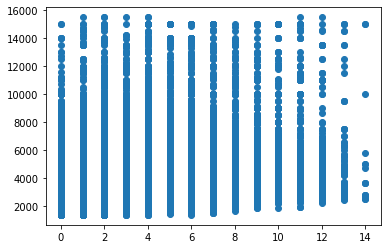

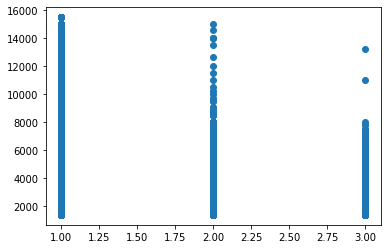

In [ ]:
df.head()

plt.scatter(df['amenities'], df['price'])
plt.show()
plt.scatter(df['interest_level'], df['price'])


# II. Split Data

**Task 3:** Split your DataFrame `df` into a feature matrix `X` and the target vector `y`. You want to predict `'price'`.

**Note:** In contrast to the last module project, this time you should include _all_ the numerical features in your dataset.

In [ ]:
X = df.select_dtypes(np.number)
X = X.drop('price', axis=1)
y = df['price']

**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from April and May 2016. 
- Your test set should include data from June 2016.

In [ ]:
X_train, y_train, X_test, y_test = train_test_split(X, y)

training = X.index < pd.to_datetime('5/2016')

X_train, y_train, X_test, y_test = X[training], y[training], X[~training], y[~training]

print(X_train)
print(X_test)
print(y_train)
print(y_test)
pd.DataFrame(training).value_counts()


                     bathrooms  bedrooms  latitude  longitude  interest_level  \
created                                                                         
2016-04-17 03:26:41        1.0         1   40.7388   -74.0018               3   
2016-04-18 02:22:02        1.0         1   40.7539   -73.9677               1   
2016-04-28 01:32:41        1.0         4   40.8241   -73.9493               1   
2016-04-19 04:24:47        2.0         4   40.7429   -74.0028               2   
2016-04-27 03:19:56        1.0         2   40.8012   -73.9660               1   
...                        ...       ...       ...        ...             ...   
2016-04-22 15:44:11        1.0         1   40.7296   -73.9869               2   
2016-04-04 18:22:34        1.0         1   40.7102   -74.0163               1   
2016-04-16 02:13:40        1.0         1   40.7601   -73.9900               1   
2016-04-08 02:13:33        1.0         0   40.7066   -74.0101               1   
2016-04-12 02:48:07        1

False    31507
True     15753
dtype: int64

# III. Establish Baseline

**Task 5:** Since this is a **regression** problem, you need to calculate the baseline mean absolute error for your model. First, calculate the mean of `y_train`. Next, create a list `y_pred` that has the same length as `y_train` and where every item in the list is the mean. Finally, use `mean_absolute_error` to calculate your baseline.

In [ ]:
y_pred = [y_train.mean()] * len(y_train)
baseline_mae = mae(y_train, y_pred)
print('Baseline MAE:', baseline_mae)


Baseline MAE: 1174.63276413039


# IV. Build Model

**Task 6:** Build and train a `LinearRegression` model named `model` using your feature matrix `X_train` and your target vector `y_train`.

In [ ]:
# Step 1: Import predictor class
from sklearn.linear_model import LinearRegression as lr
# Step 2: Instantiate predictor
model = lr()

# Step 3: Fit predictor on the (training) data
model.fit(X_train, y_train)
model.score(X_train, y_train)


0.6114634429887307

# V. Check Metrics

**Task 7:** Calculate the training and test mean absolute error for your model.

In [ ]:
training_mae = mae(y_train, model.predict(X_train))
test_mae = mae(y_test, model.predict(X_test))

print('Training MAE:', training_mae)
print('Test MAE:', test_mae)


NameError: name 'y_train' is not defined

**Task 8:** Calculate the training and test $R^2$ score for your model.

In [ ]:
training_r2 = np.sqrt(training_mae)
test_r2 = np.sqrt(test_mae)

print('Training MAE:', training_r2)
print('Test MAE:', test_r2)


Training MAE: 25.94893014386423
Test MAE: 25.868375772893263


# VI. Communicate Results

**Stretch Goal:** What are the three most influential coefficients in your linear model? You should consider the _absolute value_ of each coefficient, so that it doesn't matter if it's positive or negative.

<AxesSubplot:>

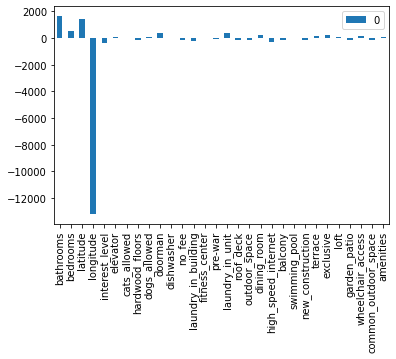

In [ ]:
pd.DataFrame(data=model.coef_, index=X.columns.to_list()).plot(kind='bar')

#the Latitude and Longitude seem to be major predictors in the linear model followed by bathrooms and bedrooms.